In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
image = mpimg.imread('../BMW_3Series_2012_redprofile_0.jpg')

In [3]:
image

array([[[198, 198, 200],
        [198, 198, 200],
        [198, 198, 200],
        ...,
        [207, 197, 198],
        [207, 197, 198],
        [207, 197, 198]],

       [[198, 198, 200],
        [198, 198, 200],
        [198, 198, 200],
        ...,
        [207, 197, 196],
        [207, 197, 196],
        [207, 197, 198]],

       [[198, 198, 200],
        [198, 198, 200],
        [198, 198, 200],
        ...,
        [206, 196, 195],
        [206, 196, 195],
        [206, 196, 195]],

       ...,

       [[182, 183, 185],
        [181, 182, 184],
        [179, 180, 182],
        ...,
        [246, 208, 163],
        [250, 207, 162],
        [248, 204, 157]],

       [[182, 183, 185],
        [181, 182, 184],
        [180, 181, 183],
        ...,
        [245, 214, 157],
        [253, 218, 162],
        [247, 211, 153]],

       [[182, 183, 185],
        [181, 182, 184],
        [181, 182, 184],
        ...,
        [245, 200, 158],
        [251, 206, 164],
        [248, 201, 159]]

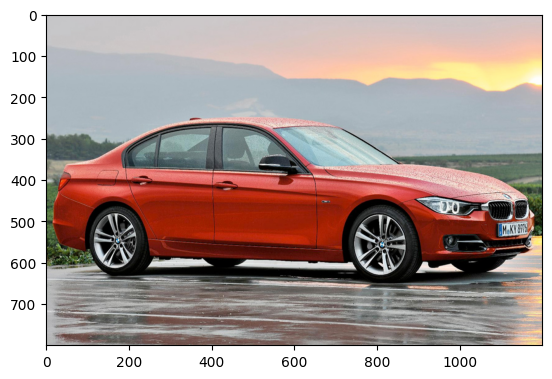

In [4]:
plt.imshow(image)

In [5]:
from sklearn.cluster import KMeans

In [102]:
model = KMeans(n_clusters=7)

In [103]:
image.shape

(800, 1200, 3)

In [104]:
h, w, c = image.shape

In [105]:
h

800

In [106]:
w

1200

In [107]:
c

3

In [108]:
new_image = image.reshape(h * w, c)

In [109]:
new_image.shape

(960000, 3)

In [110]:
label = model.fit_predict(new_image)

C:\Users\User\Desktop\ML_FUL\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [111]:
label

array([3, 3, 3, ..., 3, 3, 3])

In [112]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [113]:
rgb_codes

array([[ 94,  93,  88],
       [174, 183, 188],
       [148,  33,  12],
       [225, 202, 189],
       [ 24,  16,  14],
       [219, 104,  99],
       [134, 133, 131]])

In [114]:
quantized_image = np.reshape(rgb_codes[label], (h, w, c))

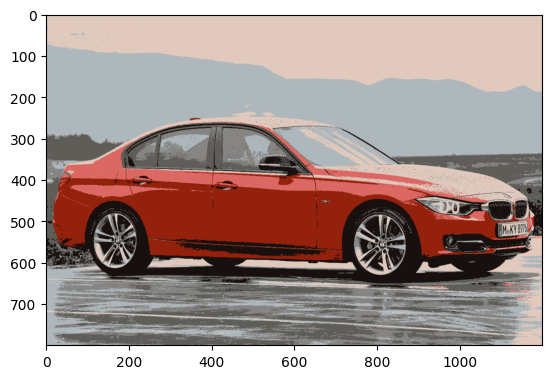

In [115]:
plt.imshow(quantized_image)

11, 214, 75

array([198, 198, 200], dtype=uint8)

In [52]:
image[34][48] = np.array([11, 214, 75])

ValueError: assignment destination is read-only

In [53]:
new = image.copy()

In [56]:
new[34:][48] = np.array([11, 214, 75])

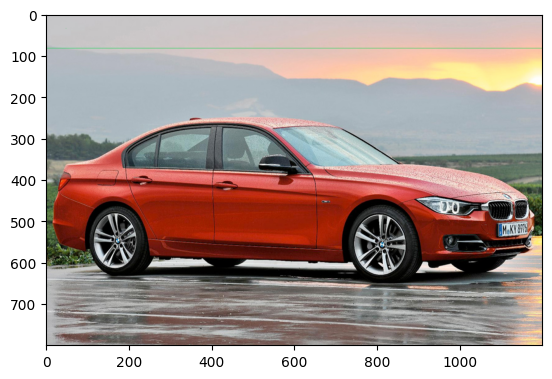

In [57]:
plt.imshow(new)

In [94]:
image1 = image.copy()
for i in image1:
    for g in i:
        if (g[0]==183 and g[1]==44 and g[2]==5):
            print(type(g))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [100]:
image1 = image.copy()
for i in range(0, len(image1)):
    for j in range(0, i):
        if image1[i][j][0] == 183 and image1[i][j][1] == 44 and image1[i][j][2] == 5:
            image1[i][j] = np.array([11, 183, 5])
        if image1[i][j][0] == 200:
            image1[i][j] = np.array([11, 183, 5])
            

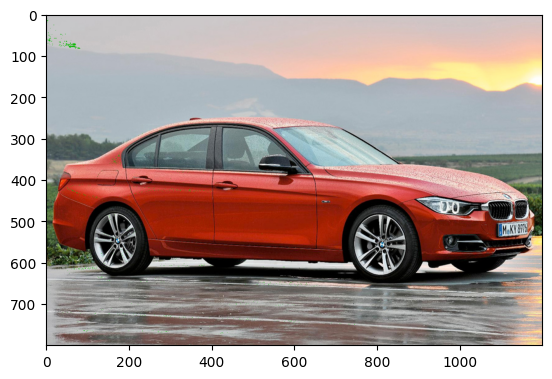

In [101]:
plt.imshow(image1)

In [116]:
df = pd.read_csv('../DATA/cluster_blobs.csv')

In [117]:
df

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
...,...,...
1495,0.882673,-6.786272
1496,0.946854,-7.254512
1497,3.180138,6.608660
1498,5.454552,6.461246


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


<Axes: xlabel='X1', ylabel='X2'>

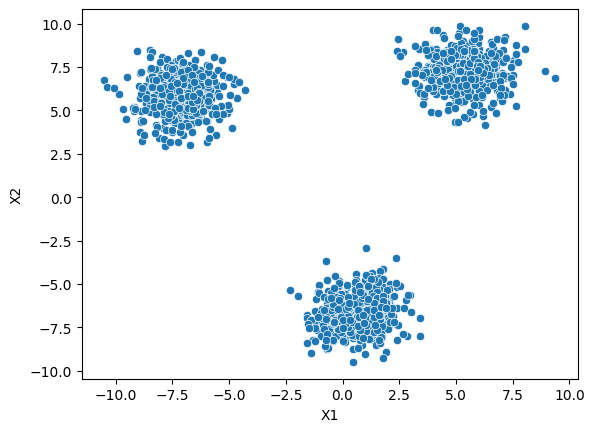

In [120]:
sns.scatterplot(x=df['X1'], y=df['X2'])

In [121]:
from sklearn.cluster import KMeans

In [122]:
model = KMeans(n_clusters=3)

In [124]:
y_label = model.fit_predict(df)

C:\Users\User\Desktop\ML_FUL\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [127]:
print(y_label.unique)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [129]:
y_label

array([1, 1, 2, ..., 1, 1, 2])

In [130]:
df.shape

(1500, 2)

In [131]:
y_label.shape

(1500,)

In [132]:
df['Y'] = y_label

In [133]:
df

,X1,X2,Y
0,4.645333,6.822294,1
1,4.784032,6.422883,1
2,-5.851786,5.774331,2
3,-7.459592,6.456415,2
4,4.918911,6.961479,1
...,...,...,...
1495,0.882673,-6.786272,0
1496,0.946854,-7.254512,0
1497,3.180138,6.608660,1
1498,5.454552,6.461246,1


<Axes: xlabel='X1', ylabel='X2'>

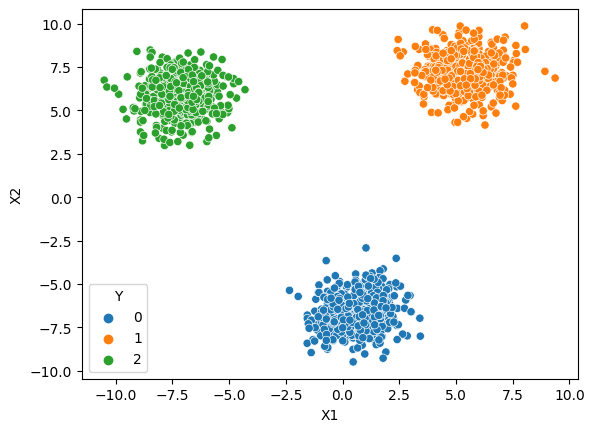

In [137]:
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['Y'], palette='tab10')

In [138]:
df

,X1,X2,Y
0,4.645333,6.822294,1
1,4.784032,6.422883,1
2,-5.851786,5.774331,2
3,-7.459592,6.456415,2
4,4.918911,6.961479,1
...,...,...,...
1495,0.882673,-6.786272,0
1496,0.946854,-7.254512,0
1497,3.180138,6.608660,1
1498,5.454552,6.461246,1


In [139]:
X = df.drop('Y', axis=1)
y = df['Y']

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
model = DecisionTreeClassifier()

In [144]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [145]:
from sklearn.tree import plot_tree

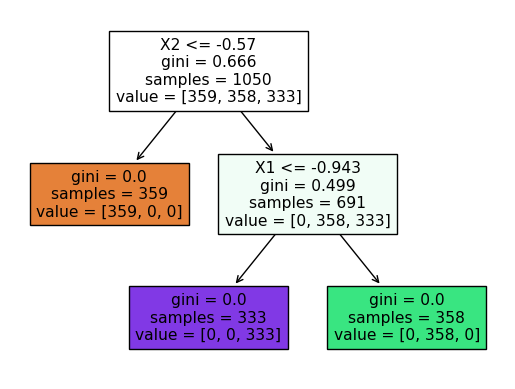

In [149]:
plot_tree(model, feature_names=X.columns, filled=True);

In [150]:
model.predict(np.array([5.5, 6]).reshape(1, -1))

C:\Users\User\Desktop\ML_FUL\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])